# Fifa Position Predictor
### Phase 2
- Ali Elmancy 201901993
- Ahmed Abdou 202005605
- Ahmed Terchoun 201802794

## Note
#### The entire data processing and data visualization is done in the first phase, this phase is dedicated to the machine learning part.

## Abstract
In phase 2 of the project we have utilized the same dataset used in phase 1, the cleaned, the processed and the final data. We have also added a tensorflow ANN model to predict the position of a player based on his attributes. Based on the outputs of all models used so far, we picked the one that gives the best accuracy and started hypertuning using gridcv. The complete data analysis made in phase 1 helped us in this phase to pick the best features to use in the model using advanced techniques infeature selections. Some of the features were dropped manually and some automatically based on correlation matrices and data properties. After the models have been tested, we came to the conclusion that no further processing needed. In this report we are going to describe the process of hypertuning and the results of the models to acheive 83% accuracy.


## Initial Results
The results of the initial models are as follows:
- Random Forest (10 estimators): 80%
- Random Forest using PCA data (10 estimators): 78%
- Logistic Regression: 76%
- Multilayer Perceptron FCM (manually tuned): 76%


## Choosing the final model
We decided to on the random forest classifier since it produced the best results and had potential to improve with hypertuning. the multilayer classifier was also a good candidate but it was already manually hypertuned and didnot have much room for improvement.


## Hypertuning
We used gridcv to hypertune the model. We used the following parameters:
- n_estimators: [25, 50, 100, 150]
- max_depth: [6, 9, 12, 24]
- max_features: [None, 'sqrt', 'log2']
- max_leaf_nodes: [None, 66, 9, 12, 24]

We chose gridcv because it is the most efficient way to hypertune a model. since it brute forces all the possible combinations of the parameters and returns the best one. It also allows us to pick the number of concurrent jobs to run in parallel, which makes it blazingly faster than the typical for loop hypertuning.

Another reason to pick gridcv is the automatic cross validation it does. It splits the data into 5 folds and trains the model on 4 folds and tests on the remaining one. It does this 5 times and returns the average accuracy of the 5 folds. This is a very good way to test the model and make sure it is not overfitting.

The best parameters were:
- max_depth: 24
- max_features: 'sqrt'
- max_leaf_nodes: 24
- n_estimators: 150

With these parameters, the model accuracy jumped from 80% to 83.2%.


## The real accuracy

Eventhough the model accuracy was 83.2%, the model displayed excellent results when plotted on a heatmap

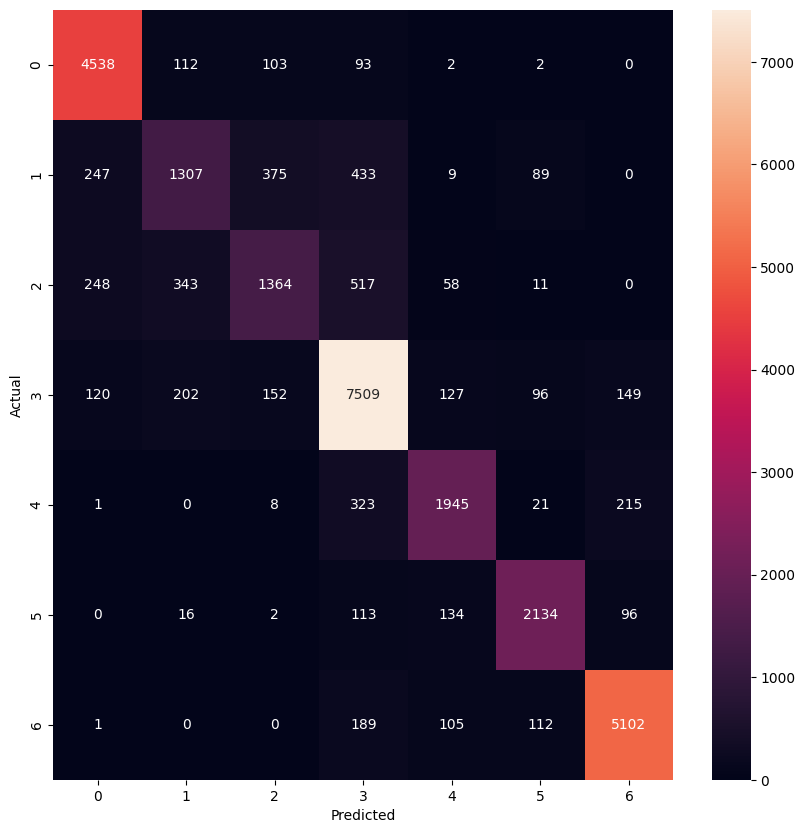

The results here shows that, the propability of the model classifying a striker as a defender is very very low. Infact, the onyl reason the accuracy is low is because it only predicts a singl position for a player, which is not the case in real life. A player can play in multiple positions of same category ex: (ST, LW, RW), and the model is not able to predict that. If we were to consider the model as a multi-label classifier, the accuracy would be much higher.